(a) Download the MovieLens 100K rating dataset from https://grouplens.org/datasets/
movielens/ (the small dataset recommended for education and development). Read the
dataset, display the first few rows to understand it, and display the count of ratings (rows)
in the dataset to be sure that you download it correctly. 

In [33]:
import pandas as pd
import numpy as np
import csv


In [34]:
dataset_links = pd.read_csv('ml-latest-small/links.csv')
dataset_movies = pd.read_csv('ml-latest-small/movies.csv')
dataset_ratings = pd.read_csv('ml-latest-small/ratings.csv')
dataset_tags = pd.read_csv('ml-latest-small/tags.csv')

rows_num = len(dataset_ratings)
print("Total number of rows:", rows_num)

first5rows = dataset_ratings.head(5)
print("\nFirst five rows:")
print(first5rows)

Total number of rows: 100836

First five rows:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


(b) Implement the user-based collaborative filtering approach, using the Pearson
correlation function for computing similarities between users 

![alt text](<Screenshot 2024-03-13 alle 15.29.37.png>)

In [35]:
''' a function to save the data present in the ratings.csv file in a dictionary of dictionaries. 
In the outermost dictionary the keys are the user ids, and each of them is associated
with a dictionary in which the keys are the movie ids and the values are the score 
assigned by that user. '''
def csv_to_dict(filename):
    users_ratings = {}
    with open(filename, newline='') as file:
        reader = csv.reader(file)
        next(reader)  # to skip the heading
        for row in reader:
            userId, movieId, rating, _ = row
            userId = int(userId)
            movieId = int(movieId)
            rating = float(rating)
            if userId not in users_ratings:
                users_ratings[userId] = {}
            users_ratings[userId][movieId] = rating
    return users_ratings

In [36]:
# test csv_to_dict function
filename = 'ml-latest-small/ratings.csv'
users_ratings = csv_to_dict(filename)
print(users_ratings)
print(users_ratings[1])

{1: {1: 4.0, 3: 4.0, 6: 4.0, 47: 5.0, 50: 5.0, 70: 3.0, 101: 5.0, 110: 4.0, 151: 5.0, 157: 5.0, 163: 5.0, 216: 5.0, 223: 3.0, 231: 5.0, 235: 4.0, 260: 5.0, 296: 3.0, 316: 3.0, 333: 5.0, 349: 4.0, 356: 4.0, 362: 5.0, 367: 4.0, 423: 3.0, 441: 4.0, 457: 5.0, 480: 4.0, 500: 3.0, 527: 5.0, 543: 4.0, 552: 4.0, 553: 5.0, 590: 4.0, 592: 4.0, 593: 4.0, 596: 5.0, 608: 5.0, 648: 3.0, 661: 5.0, 673: 3.0, 733: 4.0, 736: 3.0, 780: 3.0, 804: 4.0, 919: 5.0, 923: 5.0, 940: 5.0, 943: 4.0, 954: 5.0, 1009: 3.0, 1023: 5.0, 1024: 5.0, 1025: 5.0, 1029: 5.0, 1030: 3.0, 1031: 5.0, 1032: 5.0, 1042: 4.0, 1049: 5.0, 1060: 4.0, 1073: 5.0, 1080: 5.0, 1089: 5.0, 1090: 4.0, 1092: 5.0, 1097: 5.0, 1127: 4.0, 1136: 5.0, 1196: 5.0, 1197: 5.0, 1198: 5.0, 1206: 5.0, 1208: 4.0, 1210: 5.0, 1213: 5.0, 1214: 4.0, 1219: 2.0, 1220: 5.0, 1222: 5.0, 1224: 5.0, 1226: 5.0, 1240: 5.0, 1256: 5.0, 1258: 3.0, 1265: 4.0, 1270: 5.0, 1275: 5.0, 1278: 5.0, 1282: 5.0, 1291: 5.0, 1298: 5.0, 1348: 4.0, 1377: 3.0, 1396: 3.0, 1408: 3.0, 1445: 3.

In [37]:
# a function to calculate the mean of values in a dict
def mean(dict): 
    values = list(dict.values())
    values_sum = sum(values)
    values_num = len(values)
    mean = values_sum / values_num
    return mean

In [38]:
# Pearson Correlation function
def simPearson(user1_id, user2_id, filename = 'ml-latest-small/ratings.csv'):

    users_ratings = csv_to_dict(filename)
    user1_ratings = users_ratings[user1_id]
    user2_ratings = users_ratings[user2_id]

    # mean of ratings of the two users (ra,rb)
    mean_user1 = mean(user1_ratings)
    mean_user2 = mean(user2_ratings)

    # estract the common keys (common movies)
    common_movies = set(user1_ratings.keys()) & set(user2_ratings.keys())
    
    if not common_movies:
        return 0
    
    # calculate the differences from the averages for each user
    diff_user1 = np.array([user1_ratings[movie] - mean_user1 for movie in common_movies])
    diff_user2 = np.array([user2_ratings[movie] - mean_user2 for movie in common_movies])
    
    # numerator
    numerator = np.sum(diff_user1 * diff_user2)
    
    # calculate the standard deviations of the ratings for each user
    std_dev_user1 = np.sqrt(np.sum(diff_user1**2))
    std_dev_user2 = np.sqrt(np.sum(diff_user2**2))
    
    # denominator
    denominator = std_dev_user1 * std_dev_user2
    
    if denominator == 0:
        return 0
    
    # Pearson similarity
    similarity = numerator / denominator
    
    return similarity


In [39]:
# test simPearson function
print(simPearson(1,4))

0.21042328781675118


(c) the prediction function presented in class for predicting movies scores. 



![Screenshot 2024-03-13 alle 16.00.14.png](<attachment:Screenshot 2024-03-13 alle 16.00.14.png>)
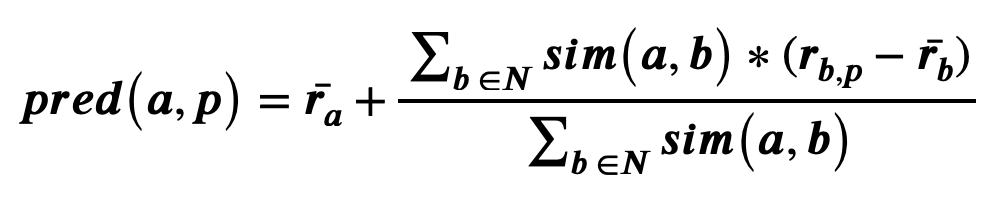

In [46]:
# prediction function for predicting a movie score
def prediction(user_target_id, movie_id, filename = 'ml-latest-small/ratings.csv'):
    num, den = 0.0,0.0
    users_ratings = csv_to_dict(filename)
    ratings_user_target = users_ratings[user_target_id]

    # if the movie has already been rated by the user, the prediction is not made and the score assigned to it is returned
    if movie_id in ratings_user_target:
        return ratings_user_target[movie_id]
    
    # ra mean
    ratings_mean_user_target = mean(ratings_user_target)

    for user_id in users_ratings:
        if(movie_id in users_ratings[user_id]):
            ratings_current_user = users_ratings[user_id]
            #rb mean
            ratings_mean_current_user = mean(ratings_current_user)
            #rbp: score assigned by user b to movie p
            movie_rating = ratings_current_user[movie_id]

            # numerator and denominator
            similarity = simPearson(user_target_id, user_id)
            num = num + (similarity * (movie_rating - ratings_mean_current_user))
            den = den + abs(similarity)
    if den == 0.0 or num == 0.0:
        return ratings_mean_user_target
    
    return ratings_mean_user_target + ((num)/(den))


In [47]:
# prediction function for predicting a movie score
''' this function is the same to the previous prediction function, but instead 
of iterating over each user, it only iterates over the k users most similar to the target user'''
def prediction2(user_target_id, movie_id, filename = 'ml-latest-small/ratings.csv'):
    num, den = 0.0,0.0
    users_ratings = csv_to_dict(filename)
    ratings_user_target = users_ratings[user_target_id]

    # if the movie has already been rated by the user, the prediction is not made and the score assigned to it is returned
    if movie_id in ratings_user_target:
        return ratings_user_target[movie_id]

    # ra mean
    ratings_mean_user_target = mean(ratings_user_target)

    # populate the dictionary 'filtered_users_ratings' with the user IDs as the key and their ratings
    # as a value but only for users who have rated the movie we want to make the prediction for
    filtered_users_ratings = {}
    for user_id in users_ratings:
        if(movie_id in users_ratings[user_id]):
            filtered_users_ratings[user_id] = users_ratings[user_id]
    # from 'filtered_users_ratings' extract the 10 most similar to our input user
    topK = topKsimilar(user_target_id, filtered_users_ratings,10)

    # calcolate the prediction on the topK
    for user_id,_ in topK:
            ratings_current_user = users_ratings[user_id]
            #rb mean
            ratings_mean_current_user = mean(ratings_current_user)
            #rbp: score assigned by user b to movie p
            movie_rating = ratings_current_user[movie_id]

            # numerator and denominator
            similarity = simPearson(user_target_id, user_id)
            num = num + (similarity * (movie_rating - ratings_mean_current_user))
            den = den + abs(similarity)
    if den == 0 or num == 0:
        return ratings_mean_user_target
    
    return ratings_mean_user_target + ((num)/(den))


In [50]:
# test prediction function
print(prediction(1,8))

3.8877407930657384


In [51]:
# test prediction2 function --> to run this cell must first run the next cell
print(prediction2(1,8))

3.8877407930657384


(d) Select a user from the dataset, and for this user, show the 10 most similar users.

In [52]:
# function that takes a user as input and returns the k users most similar to him
def topKsimilar(user_id, k, filename = 'ml-latest-small/ratings.csv'):
    similarity_dict = {}
    users_ratings = csv_to_dict(filename)
    # calculate all the Pearson similarities between the current user and other users
    for user in users_ratings:
        if user != user_id:
            similarity = simPearson(user_id, user)
            similarity_dict[user] = similarity
    # order the similarities from largest to smallest and return only the first k
    sorted_similarity = sorted(similarity_dict.items(), key=lambda x: x[1], reverse=True)
    top_k_users = sorted_similarity[:k]
    return top_k_users

In [55]:
# test topKsimilar function
print(topKsimilar(4,10))

[(107, 1.0), (158, 1.0), (245, 1.0), (291, 1.0), (431, 1.0), (537, 1.0), (556, 1.0), (544, 0.9966052666002574), (396, 0.9872178526873262), (378, 0.9854516540396345)]


(d) Select a user from the dataset, and for this user, show the 10 most relevant movies that the recommender suggests.

In [56]:
# function that takes a user as input and returns the k movies that the recommender system suggests
def topKRelevantMovies(user_id, k, filename = 'ml-latest-small/ratings.csv'):
    users_ratings = csv_to_dict(filename)
    # populate the 'unrated_movie' list with the ids of the movies to which the user has not assigned a rating
    movies_id = []
    with open('ml-latest-small/movies.csv', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)
        for row in csvreader:
            movies_id.append(int(row[0]))
    unrated_movies = [x for x in movies_id if x not in users_ratings[user_id]]

    # for each unrated movie calculate the prediction and add it to the predictions_dict where the keys are the movie ids and the values ​​are their predictions 
    predictions_dict = {}
    for movie_id in unrated_movies:
        prediction_value = prediction(user_id, movie_id, users_ratings)
        predictions_dict[movie_id] = prediction_value
        
    # order the predictions from largest to smallest and return only the first k
    sorted_prediction = sorted(predictions_dict.items(), key=lambda x: x[1], reverse=True)
    top_k_movies = sorted_prediction[:k]

    return top_k_movies

In [ ]:
# test topKrelevantMovies function
print(topKRelevantMovies(1,10))
# the esecution is too long, for this reason I have implemented a "faster" version in the next cell

(d) Select a user from the dataset, and for this user, show the 10 most relevant movies that the recommender suggests.

In [19]:
''' this function has the same purpose as the 'prediction' function but is faster
 because it uses the two data structures: ratings matrix and similarity dictionary '''
def fastPrediction(user_id, movie, user_movie_ratings_matrix, user_similarity_dict):
    # if the movie has already been rated by the user, the prediction is not made and the score assigned to it is returned
    if not np.isnan(user_movie_ratings_matrix.at[user_id, movie]):
        return user_movie_ratings_matrix.at[user_id, movie]
    
    num, den = 0.0, 0.0
    # mean of ratings of user target
    rmean_user1 = user_movie_ratings_matrix.loc[user_id].mean()
    
    #select only the users who rated the movie
    users_who_rated_movie = user_movie_ratings_matrix[movie].dropna().index.unique()

    #calcolate the prediction using ratings matrix and similarity dictionary
    for u in users_who_rated_movie:
        rmean_u = user_movie_ratings_matrix.loc[u].mean()
        r_up = user_movie_ratings_matrix.at[u, movie]
        similarity = user_similarity_dict[u]
        num += similarity * (r_up - rmean_u)
        den += abs(similarity)
    if den == 0.0:
        pred = rmean_user1
    else:
        pred = rmean_user1 + (num / den)
    return pred

In [20]:
''' This function creates a matrix with rows the users and columns the movies 
and the values in the cells are the ratings '''
def createMatrix():
    # create a list (all_movie_ids) in which I insert (by reading the movies.csv file) all the ids of all the movies
    all_movie_ids = []
    with open('ml-latest-small/movies.csv', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)
        for row in csvreader:
            all_movie_ids.append(int(row[0]))
    # store all the ratings from the ratings.csv file in the dataframe (ratings).
    ratings = pd.read_csv('ml-latest-small/ratings.csv')

    # create a table from the data in the ratings DataFrame. 
    # The data is organized so that rows represent users (userId), columns represent movies (movieId), and values ​​are ratings.
    user_movie_ratings_matrix = pd.pivot_table(ratings, values='rating', index='userId', columns='movieId')
    user_movie_ratings_matrix = user_movie_ratings_matrix.reindex(columns=all_movie_ids)
    return user_movie_ratings_matrix

In [21]:
''' Starting from a user x, this function creates a dictionary in which the keys are the ids
 of the other users and the values are the similarity (exploiting Pearson similarity) between 
 user x and the key user '''
def compute_user_similarities(user_id):
    # id users: from 1 to 610
    user_list = list(range(1, 611, 1))
    user_list.remove(user_id)
    user_similarities = {}
    # calculate the similarity and adds it to the 'user_similarities' dictionary
    for other_user in user_list:
        if other_user != user_id:
            similarity = simPearson(user_id, other_user)
            user_similarities[other_user] = similarity
    return user_similarities

In [22]:
#test compute_user_similarities function
user_similarities = compute_user_similarities(1)
print(user_similarities)

{2: 0.9999999999999998, 3: 0.011225168459991653, 4: 0.21042328781675118, 5: 0.19472139278694267, 6: -0.3020187823310265, 7: -0.04664156383054844, 8: 0.4265612329426459, 9: 0.3547385682753224, 10: -0.15121755406386428, 11: -0.4499572307079907, 12: 1.0, 13: 0.9478788458420678, 14: 0.22535350484153324, 15: 0.31204846354219923, 16: 0.0496340842921011, 17: 0.19844179978497964, 18: 0.23106109729152335, 19: 0.2257484502689187, 20: 0.5256863271011928, 21: 0.08648178161396766, 22: -0.1302706228212957, 23: -0.2606849822350734, 24: 0.05176459800704183, 25: 0.018122806444241503, 26: -0.14770835432617932, 27: 0.18060517781572197, 28: 0.009072639414787063, 29: -0.0632480567160467, 30: 0.051975198780932506, 31: 0.0524049522319235, 32: 0.270074390572318, 33: 0.10531918357689704, 34: 0.10009627479532733, 35: 0.31319277272972756, 36: 0.44197925638731156, 37: -0.41904339197822715, 38: 0.058071462757481575, 39: -0.2254567309877416, 40: -0.35522450414630197, 41: -0.14275873308542525, 42: 0.1446653347941803

In [23]:
# function that takes a user as input and returns the k movies that the recommender system suggests
''' this function has the same purpose as the 'topKrelevantMovies' function but is faster
 because it uses the fastPredition function with two data structures: ratings matrix and similarity dictionary '''
def fastTopKRelevantMovies(user_id, k):
    # populate the 'unrated_movies' list with the ids of the movies to which the user has not assigned a rating
    movies_id = []
    with open('ml-latest-small/movies.csv', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)
        for row in csvreader:
            movies_id.append(int(row[0]))
    unrated_movies = [x for x in movies_id if x not in users_ratings[user_id]]

    # generate the current user's similarity dictionary
    user_similarities = compute_user_similarities(user_id)

    # generate ratings matrix (users-movies)
    user_movie_ratings_matrix = createMatrix()

    # for each unrated movie calculate the prediction and add it to the predictions list as a tuple (movie id, predicted raiting)
    predictions = []
    for m in unrated_movies:
        # print the id of the movie whose score is predicting
        print("m: "+str(m))
        pred = fastPrediction(user_id, m, user_movie_ratings_matrix, user_similarities)
        predictions.append((m, pred))
    # order the predictions from largest to smallest and return only the first k
    sorted_predictions = sorted(predictions, reverse=True, key=lambda x: x[1])
    top_k_predictions = sorted_predictions[:k]
    return top_k_predictions

In [24]:
# test fastTopKRelevantMovies function
print(fastTopKRelevantMovies(1,10))

m: 2
m: 4
m: 5
m: 7
m: 8
m: 9
m: 10
m: 11
m: 12
m: 13
m: 14
m: 15
m: 16
m: 17
m: 18
m: 19
m: 20
m: 21
m: 22
m: 23
m: 24
m: 25
m: 26
m: 27
m: 28
m: 29
m: 30
m: 31
m: 32
m: 34
m: 36
m: 38
m: 39
m: 40
m: 41
m: 42
m: 43
m: 44
m: 45
m: 46
m: 48
m: 49
m: 52
m: 53
m: 54
m: 55
m: 57
m: 58
m: 60
m: 61
m: 62
m: 63
m: 64
m: 65
m: 66
m: 68
m: 69
m: 71
m: 72
m: 73
m: 74
m: 75
m: 76
m: 77
m: 78
m: 79
m: 80
m: 81
m: 82
m: 83
m: 85
m: 86
m: 87
m: 88
m: 89
m: 92
m: 93
m: 94
m: 95
m: 96
m: 97
m: 99
m: 100
m: 102
m: 103
m: 104
m: 105
m: 106
m: 107
m: 108
m: 111
m: 112
m: 113
m: 116
m: 117
m: 118
m: 119
m: 121
m: 122
m: 123
m: 125
m: 126
m: 128
m: 129
m: 132
m: 135
m: 137
m: 140
m: 141
m: 144
m: 145
m: 146
m: 147
m: 148
m: 149
m: 150
m: 152
m: 153
m: 154
m: 155
m: 156
m: 158
m: 159
m: 160
m: 161
m: 162
m: 164
m: 165
m: 166
m: 168
m: 169
m: 170
m: 171
m: 172
m: 173
m: 174
m: 175
m: 176
m: 177
m: 178
m: 179
m: 180
m: 181
m: 183
m: 184
m: 185
m: 186
m: 187
m: 188
m: 189
m: 190
m: 191
m: 193
m: 194
m: 195
m: 

(e) Design and implement a new similarity function for computing similarities between 
users. Explain why this similarity function is useful for the collaborative filtering approach. 
Hint: Exploiting ideas from related works are highly encouraged.

![alt text](<Screenshot 2024-03-16 alle 14.58.05.png>)

In [74]:
# Cosine similarity function
def simCosine(user1_id, user2_id, filename='ml-latest-small/ratings.csv'):
    users_ratings = csv_to_dict(filename)
    
    user1_ratings = users_ratings[user1_id]
    user2_ratings = users_ratings[user2_id]
    
    # estract common movies between the two users
    common_movies = set(user1_ratings.keys()) & set(user2_ratings.keys())
    
    if not common_movies:
        return 0
    
    # ratings of users about common movies
    common_movies_ratings_user1 = np.array([user1_ratings[movie] for movie in common_movies])
    common_movies_ratings_user2 = np.array([user2_ratings[movie] for movie in common_movies])
    
    # cosine similarity
    similarity = np.dot(common_movies_ratings_user1, common_movies_ratings_user2) / (np.linalg.norm(common_movies_ratings_user1) * np.linalg.norm(common_movies_ratings_user2))
    
    return similarity


In [93]:
# test simCosine function
print(simCosine(1,4))

0.9392428790634791
